***

*Course:* [Math 444](https://people.math.wisc.edu/~hlyu36/GNiDS/) - Graphs and Networks in Data Science (MMiDS) - Fall 2023

*Author:* [Hanbaek Lyu](https://hanbaeklyu.com), Department of Mathematics, University of Wisconsin-Madison  

***

In [76]:
### Load some packages 

import networkx as nx # for handling graphs/networks 
import numpy as np # for basic scientific computing 
import matplotlib.pyplot as plt # for plotting
import matplotlib.gridspec as gridspec

# below is used for fancy figure titles using latex

plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    #"font.size"   : 15,
    "text.usetex": True,  # use inline math for ticks
    "pgf.rcfonts": False,  # don't setup fonts from rc parameters
    "pgf.preamble": "\n".join([
        "\\usepackage{units}",  # load additional packages
        "\\usepackage{metalogo}",
        "\\usepackage{unicode-math}",  # unicode math setup
        r"\setmathfont{xits-math.otf}",
        r"\setmainfont{DejaVu Serif}",  # serif font via preamble
    ])
})

# BFS and DFS

In [77]:
def DFS(G, s, visited=None):  #function for DFS 
    if visited is None:
        visited = []
    ### Depth-first-search
    if s not in visited:
        visited.append(s)
        for u in list(G.neighbors(s)):
            visited = DFS(G, u, visited=visited) # recursive call of DFS 
    return visited 

In [3]:
def BFS(G, s): #function for BFS
    queue = []
    visited = []
    visited.append(s)
    queue.append(s)
    while len(queue)>0:   # Creating loop to visit each node
        v = queue.pop(0)  # first remaining entry in queue 
        for u in G.neighbors(v):
            if u not in visited:
                visited.append(u)
                queue.append(u)
    return visited 

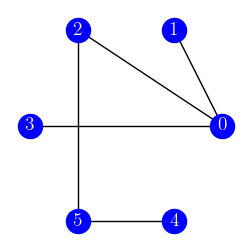

In [78]:
import networkx as nx # for handling graphs/networks 
import numpy as np # for basic scientific computing 
import matplotlib.pyplot as plt # for plotting

# Create a simple graph object G 
G = nx.Graph()

# Start adding edges (cf. Python counts things from 0 not one.)
G.add_edge(0,1)
G.add_edge(0,2)
G.add_edge(0,3)
G.add_edge(2,5)
G.add_edge(4,5)

# plot the graph 
fig = plt.figure(figsize=[3,3], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(G, ax=ax, pos=nx.circular_layout(G), labels={i: i for i in range(6)},
                 node_size=300, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

In [79]:
DFS(G, 0)

[0, 1, 2, 5, 4, 3]

In [81]:
BFS(G, 0)

[0, 1, 2, 3, 5, 4]

In [82]:
DFS(G, 4)

[4, 5, 2, 0, 1, 3]

In [83]:
BFS(G, 4)

[4, 5, 2, 0, 1, 3]

## Using BFS and DFS to compute connected components 

In [30]:
# Initialize graph 
G = nx.Graph()

# Load COVID_PPI.txt edgelist
path = "../Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) 

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1]) 

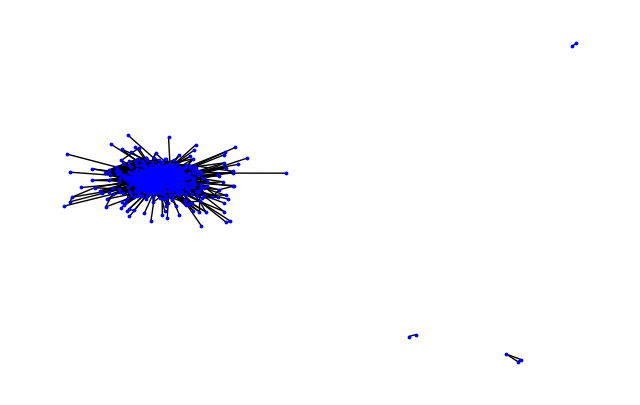

In [10]:
# plot the graph 
fig = plt.figure(figsize=[8,5], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(G, ax=ax, pos=nx.spring_layout(G), labels={},
                 node_size=3, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

In [11]:
n_cc = len(sorted(nx.connected_components(G), key=len, reverse=True)) 
print("Number of connected components in G:", n_cc) # Verify the result with the plot above 

Number of connected components in G: 4


In [12]:
def compute_connected_components(G):
    ### compute all connected components of G 
    ### output = dictionary of {component index : nodes in the component}
    nodes = list(G.nodes())
    connected_components = {}
    remaining_nodes = list(G.nodes())
    i = 0
    while len(remaining_nodes) > 0 :
        comp = DFS(G,remaining_nodes[0])
        connected_components.update({i: comp.copy()}) 
        remaining_nodes = [v for v in remaining_nodes if v not in comp]
        i += 1
    for i in connected_components.keys():
        print("Size of the {}th component = {}".format(i, len(connected_components.get(i))))
    return connected_components

In [13]:
connected_components = compute_connected_components(G)

Size of the 0th component = 762
Size of the 1th component = 3
Size of the 2th component = 2
Size of the 3th component = 2


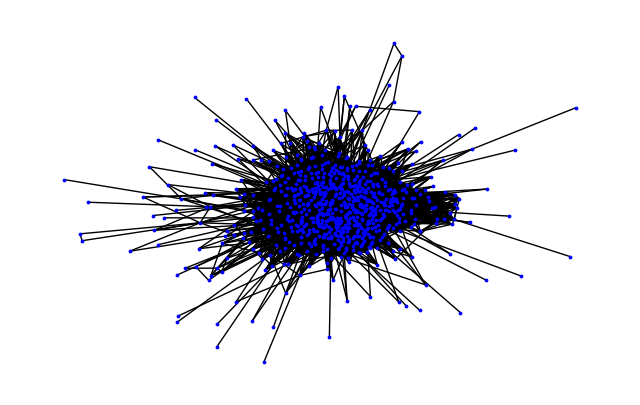

In [14]:
H = G.subgraph(nodes=connected_components.get(0)) 

# plot the graph 
fig = plt.figure(figsize=[8,5], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(H, ax=ax, pos=nx.spring_layout(H), labels={},
                 node_size=3, node_color="blue", font_size=14, font_color="white")
plt.axis('off');

Size of the 0th component = 762
Size of the 1th component = 3
Size of the 2th component = 2
Size of the 3th component = 2


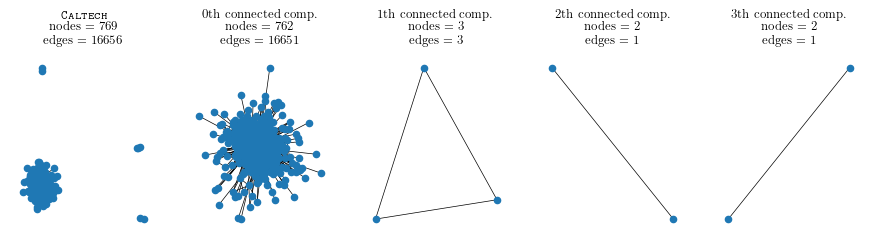

In [15]:
### Load Caltech and compute all connected components 
G = nx.Graph()

# Load COVID_PPI.txt edgelist
path = "../Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) 

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1]) 

connected_components = compute_connected_components(G)

### Plot the original graph and all connected components 

fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
outer_grid = gridspec.GridSpec(nrows=2, ncols=len(connected_components)+1, wspace=0.2, hspace=0.1)

for i in np.arange(len(connected_components)+1): 
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    
    if i == 0:
        H = G
        ax.set_title("$\\textsc{\\texttt{Caltech}}$" 
                     +"\n" + "nodes = {}".format(len(H.nodes))
                     +"\n" + "edges = {}".format(len(H.edges)), fontsize=9)
    else: 
        H = G.subgraph(nodes=connected_components.get(i-1))
        ax.set_title(r"{}th connected comp.".format(i-1) 
                     +"\n" + "nodes = {}".format(len(H.nodes))
                     +"\n" + "edges = {}".format(len(H.edges)), fontsize=9)
    
        
    ## Plot the (sub)graphs
    
    edges = H.edges()
    weights = [0.5 for u,v in G.edges]
    nx.draw(H, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.spring_layout(H))
    #ax.legend()
    
plt.savefig("Caltech_connected_comps", bbox_inches="tight")

## Using BFS and DFS to compute spanning trees

*To install graphviz on Apple sillicon macs*, do 

(install homebrew)

brew install graphviz

conda install python-graphviz

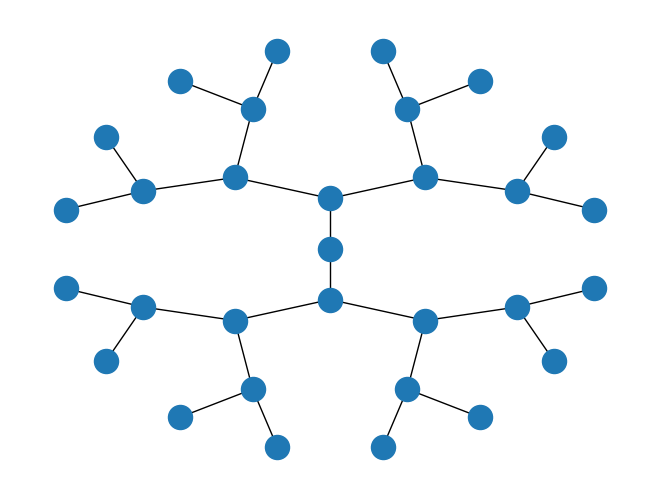

In [102]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

T = nx.balanced_tree(2, 4)

pos = graphviz_layout(T, prog="twopi")
nx.draw(T, pos)
plt.show()

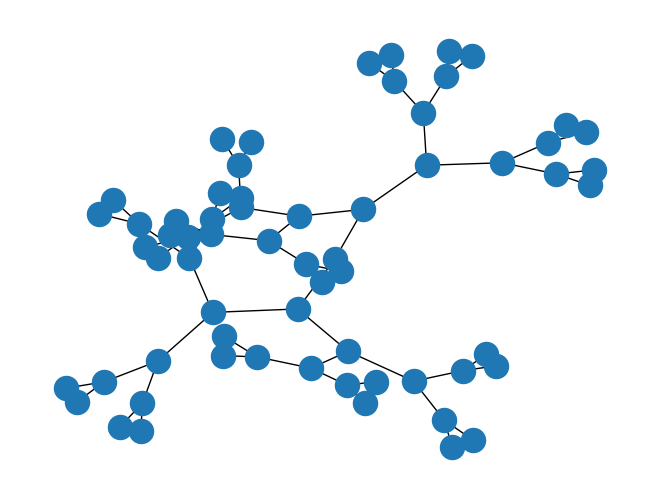

In [88]:
nx.draw(T, pos = nx.spring_layout(T))

In [63]:
def Spanning_tree_BFS(G, s): #function for BFS
    queue = []
    visited = []
    edges_T = []
    visited.append(s)
    queue.append(s)
    while len(queue)>0:   # Creating loop to visit each node
        v = queue.pop(0)  # first remaining entry in queue 
        for u in G.neighbors(v):
            if u not in visited:
                visited.append(u)
                queue.append(u)
                edges_T.append([u,v])
    return visited, edges_T

In [16]:
def Spanning_tree_DFS(G, s, visited=None, edges_T=None):  #function for DFS 
    if visited is None:
        visited = []
        edges_T = []
    if s not in visited:
        visited.append(s)
        for u in list(G.neighbors(s)):
            if u not in visited: 
                edges_T.append([s,u])
            visited, edges_T = Spanning_tree_DFS(G, u, visited=visited, edges_T=edges_T) # recursive call of DFS 
    return visited, edges_T

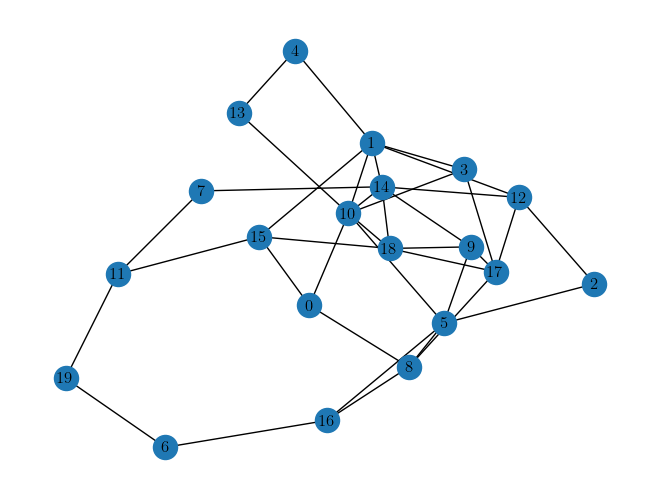

In [99]:
G = nx.erdos_renyi_graph(n=20,p=0.2)
nx.draw(G, with_labels=True)

In [90]:
visited, edges_T = Spanning_tree_DFS(G, list(G.nodes())[0])


In [91]:
visited

[0, 1, 5, 2, 4, 12, 9, 6, 7, 3, 11, 15, 16, 17, 13, 14, 19, 18, 8, 10]

In [92]:
edges_T

[[0, 1],
 [1, 5],
 [5, 2],
 [2, 4],
 [4, 12],
 [12, 9],
 [9, 6],
 [6, 7],
 [7, 3],
 [3, 11],
 [3, 15],
 [15, 16],
 [16, 17],
 [17, 13],
 [13, 14],
 [14, 19],
 [16, 18],
 [18, 8],
 [0, 10]]

In [93]:
T = nx.Graph()
for e in edges_T:
    T.add_edge(e[0], e[1])

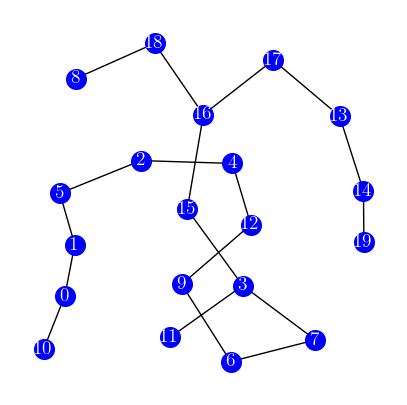

In [98]:
# plot the graph 
fig = plt.figure(figsize=[5,5], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(T, ax=ax, pos=graphviz_layout(T, prog="fdp"), with_labels=True, 
                 node_size=200, node_color="blue", font_size=14, font_color="white")
# If you find trouble installing and using graphviz, use the built-in networkx layouts 
# by replaving "graphviz_layout(T, prog="fdp")" with "nx.spring_layout(T)"
plt.axis('off');

In [100]:
## Initialize graph 
G = nx.Graph()

# Load COVID_PPI.txt edgelist
path = "../Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) 

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1]) 
    
## Compute BFS spanning tree 

visited, edges_T = Spanning_tree_BFS(G, list(G.nodes())[0])

T = nx.Graph()
for e in edges_T:
    T.add_edge(e[0], e[1])

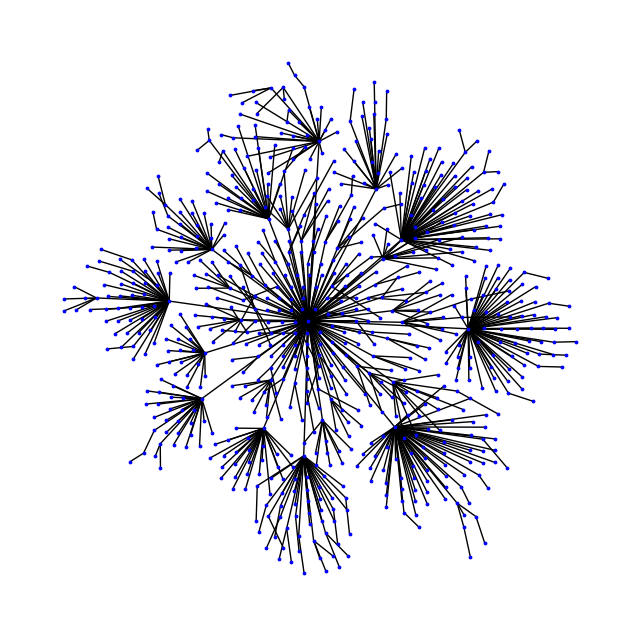

In [72]:
# plot the graph 
fig = plt.figure(figsize=[8, 8], constrained_layout=False)
ax = fig.add_subplot()
nx.draw_networkx(T, ax=ax, pos=graphviz_layout(T, prog="fdp"), with_labels=False, 
                 node_size=3, node_color="blue", font_size=14, font_color="white")
# If you find trouble installing and using graphviz, use the built-in networkx layouts 
# by replaving "graphviz_layout(T, prog="fdp")" with "nx.spring_layout(T)"
plt.axis('off');

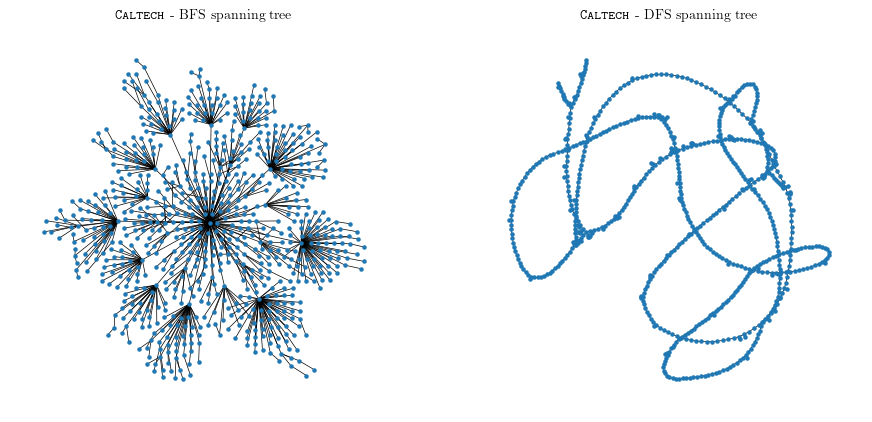

In [75]:
### Load Caltech and compute all connected components 
G = nx.Graph()

# Load COVID_PPI.txt edgelist
path = "../Data/Caltech36.txt"
edgelist = list(np.genfromtxt(path, delimiter=",", dtype=str)) 

# Add in all edges in the edgelist to G
for e in edgelist:
    G.add_edge(e[0], e[1]) 

### Plot the original graph and all connected components 

fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
outer_grid = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.2, hspace=0.1)

for i in range(2): 
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    
    if i == 0:
        ## Compute BFS spanning tree 
        visited, edges_T = Spanning_tree_BFS(G, list(G.nodes())[0])
        ax.set_title("$\\textsc{\\texttt{Caltech}}$ - BFS spanning tree", fontsize=10)
    else: 
        visited, edges_T = Spanning_tree_DFS(G, list(G.nodes())[0])
        ax.set_title("$\\textsc{\\texttt{Caltech}}$ - DFS spanning tree", fontsize=10)
        
    T = nx.Graph()
    for e in edges_T:
        T.add_edge(e[0], e[1])

    edges = T.edges()
    weights = [0.5 for u,v in T.edges]
    nx.draw(T, with_labels=False, width=weights, node_size=5, ax=ax, label='Graph', pos=graphviz_layout(T, prog="fdp"))
    #ax.legend()
    
plt.savefig("Caltech_spanning_trees", bbox_inches="tight")

# Kruskal's MST algorithm

In [322]:
def Kruskal_MST(wtd_edgelist):
    ### Kruskal's MST algorithm
    ### input = list of weighted edges; nodes need to be indexed by integers 
    ## "find_root" and "forest_add_edge" maintain rooted forest structure to efficiently check 
    ## whether adding a new edge  introduces a cycle 
    
    def find_root(parent, i):
        if parent[i] == i:
            return i
        return find(parent, parent[i])

    def forest_add_edge(parent, rank, x, y):
        xroot = find_root(parent, x)
        yroot = find_root(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
        return parent, rank

    result = []
    i, e = 0, 0
    # Sort weighted edges
    wtd_edgelist = sorted(wtd_edgelist, key=lambda item: item[2])
    parent = []
    rank = []
    nodes = list(set([v[0] for v in wtd_edgelist] + [v[1] for v in wtd_edgelist]))
    # Important for find ft. that nodes in this list is in increasing order 
    for node in nodes:
        parent.append(node)
        rank.append(0)
    while e < len(parent) - 1:
        u, v, w = wtd_edgelist[i]
        i = i + 1
        x = find_root(parent, u)
        y = find_root(parent, v)
        if x != y:
            e = e + 1
            result.append([u, v, w])
            parent, rank = forest_add_edge(parent, rank, x, y)
    
    return result

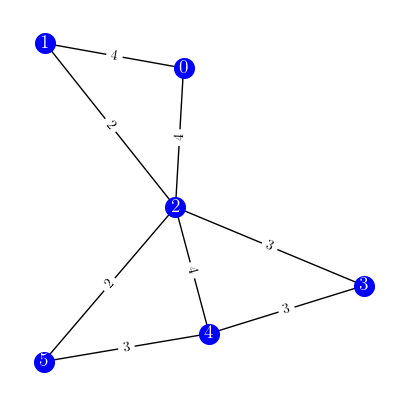

In [323]:
G = nx.Graph()
G.add_edge(0, 1, weight=4)
G.add_edge(0, 2, weight=4)
G.add_edge(1, 2, weight=2)
G.add_edge(1, 0, weight=4)
G.add_edge(2, 0, weight=4)
G.add_edge(2, 1, weight=2)
G.add_edge(2, 3, weight=3)
G.add_edge(2, 5, weight=2)
G.add_edge(2, 4, weight=4)
G.add_edge(3, 2, weight=3)
G.add_edge(3, 4, weight=3)
G.add_edge(4, 2, weight=4)
G.add_edge(4, 3, weight=3)
G.add_edge(5, 2, weight=2)
G.add_edge(5, 4, weight=3)

fig = plt.figure(figsize=[5,5], constrained_layout=False)
ax = fig.add_subplot()
pos=nx.spring_layout(G)
nx.draw_networkx(G, ax=ax, pos=pos, with_labels=True, 
                 node_size=200, node_color="blue", font_size=14, font_color="white")
plt.axis('off');
labels = nx.get_edge_attributes(G,'weight');
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);

In [324]:
wtd_edgelist = []
for f in list(G.edges(data=True)):
    wtd_edgelist.append([f[0], f[1], f[2].get("weight")])

result = Kruskal_MST(wtd_edgelist)

In [325]:
result

[[1, 2, 2], [2, 5, 2], [2, 3, 3], [3, 4, 3], [0, 1, 4]]

In [326]:
T = nx.Graph()
for e in result:
    T.add_edge(e[0], e[1], weight=e[2])

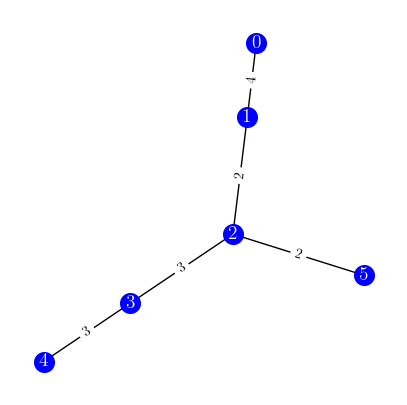

In [327]:
fig = plt.figure(figsize=[5,5], constrained_layout=False)
ax = fig.add_subplot()
pos=nx.spring_layout(T)
nx.draw_networkx(T, ax=ax, pos=pos, with_labels=True, 
                 node_size=200, node_color="blue", font_size=14, font_color="white")
plt.axis('off');
labels = nx.get_edge_attributes(T,'weight');
nx.draw_networkx_edge_labels(T,pos,edge_labels=labels);

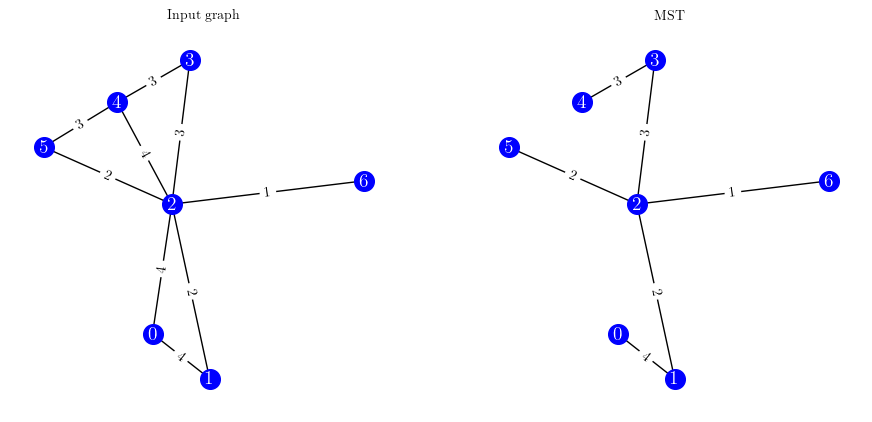

In [328]:
### Load Caltech and compute all connected components 
G = nx.Graph()
G.add_edge(0, 1, weight=4)
G.add_edge(0, 2, weight=4)
G.add_edge(1, 2, weight=2)
G.add_edge(1, 0, weight=4)
G.add_edge(2, 0, weight=4)
G.add_edge(2, 1, weight=2)
G.add_edge(2, 3, weight=3)
G.add_edge(2, 5, weight=2)
G.add_edge(2, 4, weight=4)
G.add_edge(3, 2, weight=3)
G.add_edge(3, 4, weight=3)
G.add_edge(4, 2, weight=4)
G.add_edge(4, 3, weight=3)
G.add_edge(5, 2, weight=2)
G.add_edge(5, 4, weight=3)
G.add_edge(6, 2, weight=1)

wtd_edgelist = []
for f in list(G.edges(data=True)):
    wtd_edgelist.append([f[0], f[1], f[2].get("weight")])

### Plot the original graph and all connected components 

fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
outer_grid = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.2, hspace=0.1)

for i in range(2): 
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    
    if i == 0:
        ## Plot the original weighted graph 
        ax.set_title("Input graph", fontsize=10)
        pos=nx.spring_layout(G)
        nx.draw_networkx(G, ax=ax, pos=pos, with_labels=True, 
                         node_size=200, node_color="blue", font_size=14, font_color="white")
        plt.axis('off');
        labels = nx.get_edge_attributes(G,'weight');
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);
        
        
    else:  ## plot MST
        ax.set_title("MST", fontsize=10)
        
        result = Kruskal_MST(wtd_edgelist)
        T = nx.Graph()
        for e in result:
            T.add_edge(e[0], e[1], weight=e[2])
        
        #pos=nx.spring_layout(T)
        nx.draw_networkx(T, ax=ax, pos=pos, with_labels=True, 
                         node_size=200, node_color="blue", font_size=14, font_color="white")
        plt.axis('off');
        labels = nx.get_edge_attributes(T,'weight');
        nx.draw_networkx_edge_labels(T,pos,edge_labels=labels);
        
        
    
plt.savefig("MST_ex1", bbox_inches="tight")

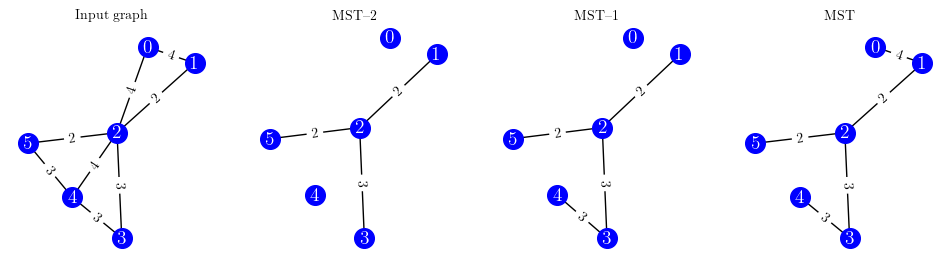

In [329]:
### Load Caltech and compute all connected components 
G = nx.Graph()
G.add_edge(0, 1, weight=4)
G.add_edge(0, 2, weight=4)
G.add_edge(1, 2, weight=2)
G.add_edge(1, 0, weight=4)
G.add_edge(2, 0, weight=4)
G.add_edge(2, 1, weight=2)
G.add_edge(2, 3, weight=3)
G.add_edge(2, 5, weight=2)
G.add_edge(2, 4, weight=4)
G.add_edge(3, 2, weight=3)
G.add_edge(3, 4, weight=3)
G.add_edge(4, 2, weight=4)
G.add_edge(4, 3, weight=3)
G.add_edge(5, 2, weight=2)
G.add_edge(5, 4, weight=3)

wtd_edgelist = []
for f in list(G.edges(data=True)):
    wtd_edgelist.append([f[0], f[1], f[2].get("weight")])

### Plot the original graph and all connected components 

fig = plt.figure(figsize=[12,3], constrained_layout=False)
network_list = [""]
steps = 2
outer_grid = gridspec.GridSpec(nrows=1, ncols=steps+2, wspace=0.2, hspace=0.1)

for i in range(steps+2): 
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    
    edges_T = Kruskal_MST(wtd_edgelist)
    
    
    if i == 0:
        ## Plot the original weighted graph 
        ax.set_title("Input graph", fontsize=10)
        pos=nx.spring_layout(G)
        nx.draw_networkx(G, ax=ax, pos=pos, with_labels=True, 
                         node_size=200, node_color="blue", font_size=14, font_color="white")
        plt.axis('off');
        labels = nx.get_edge_attributes(G,'weight');
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels);
        
        
    else:  ## plot MST
        
        T = nx.Graph()
        T.add_nodes_from(G)
        edges_T1 = edges_T[:len(edges_T)-steps+i-1]
        for e in edges_T1:
            T.add_edge(e[0], e[1], weight=e[2])
        
        if i < steps+1:
            ax.set_title("MST-{}".format(-steps+i-1), fontsize=10)
        else: 
            ax.set_title("MST", fontsize=10)
            
        #pos=nx.spring_layout(T)
        nx.draw_networkx(T, ax=ax, pos=pos, with_labels=True, 
                         node_size=200, node_color="blue", font_size=14, font_color="white")
        plt.axis('off');
        labels = nx.get_edge_attributes(T,'weight');
        nx.draw_networkx_edge_labels(T,pos,edge_labels=labels);
        
        
    
plt.savefig("MST_ex1", bbox_inches="tight")

# Node embedding

In [435]:
def list2onehot(y, list_classes=None):
    """
    y = list of class lables of length n
    output = n x k array, i th row = one-hot encoding of y[i] (e.g., [0,0,1,0,0])
    """
    if list_classes is None:
        list_classes = list(np.sort(c))
    Y = np.zeros(shape = [len(y), len(list_classes)], dtype=int)
    for i in np.arange(Y.shape[0]):
        for j in np.arange(len(list_classes)):
            if y[i] == list_classes[j]:
                Y[i,j] = 1
    return Y

def SBM(W, c):
    # Stochastic block model; 
    # W = (k x k) community weight matrix 
    # c = (n x 1), entries from [k]; community assignment vector
    k = W.shape[0]
    n = len(c)
    
    # C = (n x k) one-hot encoding of community assignment matrix
    C = list2onehot(c, list_classes=[i for i in range(k)])

    # C = (n x n) probability matrix = expected adjacency matrix = C W C.T
    P = C @ W @ C.T
    
    # Now sample the edges according to P
    G = nx.Graph()
    G.add_nodes_from(range(n))
    nodes = list(G.nodes())
    
    for i in np.arange(n):
        for j in np.arange(i+1,n):
            U = np.random.rand()
            if U < P[i,j]:
                G.add_edge(nodes[i],nodes[j])
    return G

In [457]:
a = 0.7
b = 0.3
W = b * np.ones([3,3]) + (a-b) * np.eye(3)
# W = np.array([[0.5, 0.1, 0.1], [0.1, 0.5, 0.1], [0.1, 0.1, 0.5]])

r = 10
c = [0]*r + [1]*r + [2]*r

G = SBM(W,c)

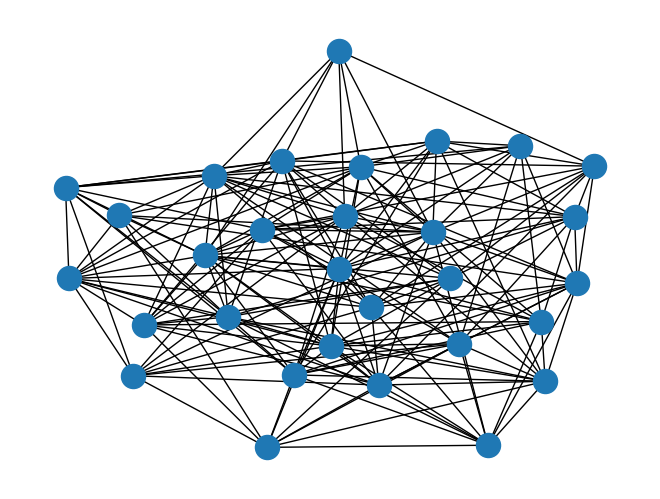

In [458]:
nx.draw(G)

In [490]:
L = nx.normalized_laplacian_matrix(G).todense()
#L = nx.adjacency_matrix(G).todense()

<class 'networkx.utils.decorators.argmap'> compilation 32:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [491]:
w, v = np.linalg.eigh(L)

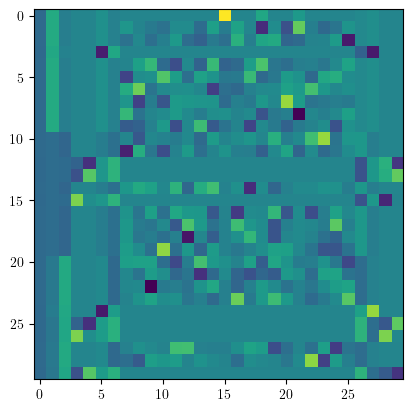

In [492]:
plt.imshow(v)

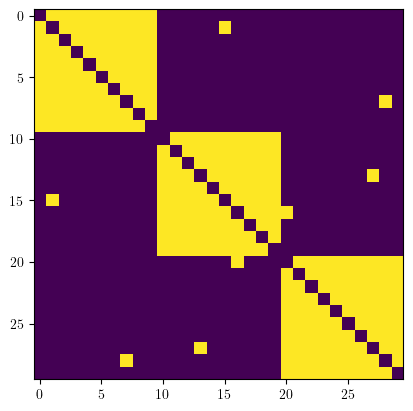

In [469]:
plt.imshow(L)

In [486]:
eigenvalues, eigenvectors = np.linalg.eigh(L)

In [487]:
eigenvalues

array([-2.35498085e+00, -2.00000000e+00, -1.80903923e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -2.22466480e-01, -7.99971021e-16,  6.96023990e-01,  8.62426740e+00,
        8.83840611e+00,  9.22778906e+00])

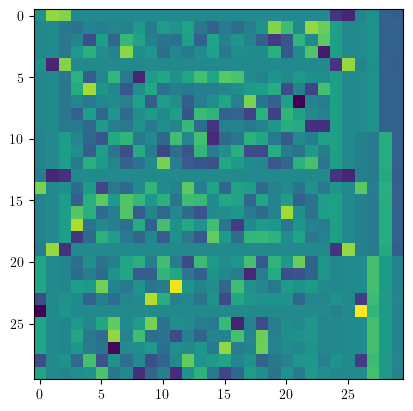

In [488]:
plt.imshow(eigenvectors)

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_68321/1875166825.py:23: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()
<class 'networkx.utils.decorators.argmap'> compilation 32:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


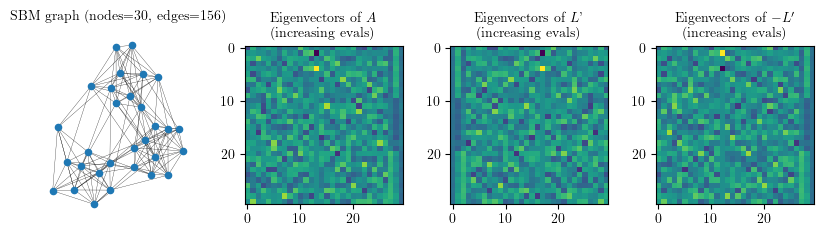

In [503]:
## Generate SBM graph
a = 0.9
b = 0.1
W = b * np.ones([3,3]) + (a-b) * np.eye(3)
# W = np.array([[0.5, 0.1, 0.1], [0.1, 0.5, 0.1], [0.1, 0.1, 0.5]])
r = 10
c = [0]*r + [1]*r + [2]*r
G = SBM(W,c)

## Plot graph

fig = plt.figure(figsize=[10,2.5], constrained_layout=False)
outer_grid = gridspec.GridSpec(nrows=1, ncols=4, wspace=0.3, hspace=0.1)

inner_grid = outer_grid[0,0].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])
nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax)
ax.set_title("SBM graph (nodes={}, edges={})".format(len(list(G.nodes())), len(list(G.edges())) ) , fontsize=10)

inner_grid = outer_grid[0,1].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])

A = nx.adjacency_matrix(G).todense()
w, v = np.linalg.eigh(A)
ax.imshow(v)
ax.set_title(r"Eigenvectors of $A$"+ "\n" + "(increasing evals)" , fontsize=10)

inner_grid = outer_grid[0,2].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])

L = nx.normalized_laplacian_matrix(G).todense()
w, v = np.linalg.eigh(L)
ax.imshow(v)
ax.set_title(r"Eigenvectors of $L$' " + "\n" + "(increasing evals)" , fontsize=10)

inner_grid = outer_grid[0,3].subgridspec(1, 1, wspace=0, hspace=0)
ax = fig.add_subplot(inner_grid[0, 0])

L = nx.normalized_laplacian_matrix(G).todense()
w, v = np.linalg.eigh(-L)
ax.imshow(v)
ax.set_title(r"Eigenvectors of $-L'$ " + "\n" + "(increasing evals)" , fontsize=10)

plt.savefig("SBM_spectrum", bbox_inches="tight")

In [473]:
d = 2
U = np.array(eigenvectors[:, :d])

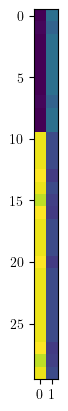

In [474]:
plt.imshow(U)

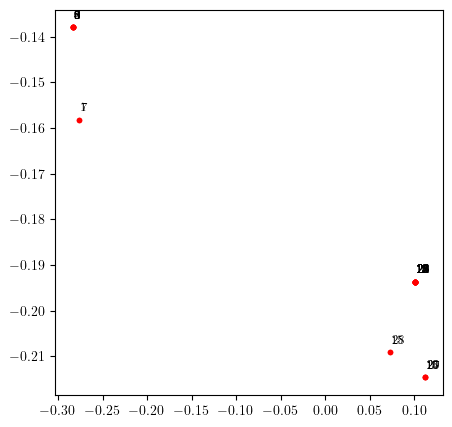

In [476]:
fig = plt.figure(figsize=[5,5], constrained_layout=False)
ax = fig.add_subplot()
offset = 0.002
nodes = list(G.nodes())
for i in np.arange(len(nodes)):
    x, y = U[i,:]
    ax.scatter(x, y, marker='.', color='red')
    ax.text(x+offset, y+offset, nodes[i], fontsize=9)

#plt.ylim(-0.3,0.3)

#plt.text(x+.03, y+.03, word, fontsize=9)

#for i, txt in enumerate(np.arange(len(x))):
    #ax.annotate(names[i], (x[i], y[i]))



/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_68321/3872293469.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


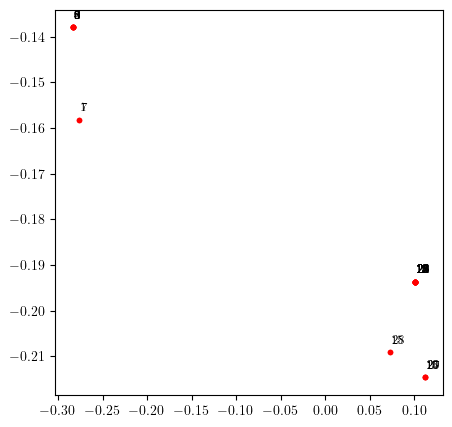

In [467]:
# Generate SBM
a = 0.99
b = 0.01
W = b * np.ones([3,3]) + (a-b) * np.eye(3)
# W = np.array([[0.5, 0.1, 0.1], [0.1, 0.5, 0.1], [0.1, 0.1, 0.5]])

r = 10
c = [0]*r + [1]*r + [2]*r

G = SBM(W,c)

# Spectral Embedding
#L = nx.normalized_laplacian_matrix(G).todense()
A = nx.adjacency_matrix(G).todense()
eigenvalues, eigenvectors = LA.eig(A)
d = 2
U = np.array(eigenvectors[:, :d])

# Plot
fig = plt.figure(figsize=[5,5], constrained_layout=False)
ax = fig.add_subplot()
offset = 0.002
nodes = list(G.nodes())
for i in np.arange(len(nodes)):
    x, y = U[i,:]
    ax.scatter(x, y, marker='.', color='red')
    ax.text(x+offset, y+offset, nodes[i], fontsize=9)


#plt.text(x+.03, y+.03, word, fontsize=9)

#for i, txt in enumerate(np.arange(len(x))):
    #ax.annotate(names[i], (x[i], y[i]))



/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_68321/444544126.py:14: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()


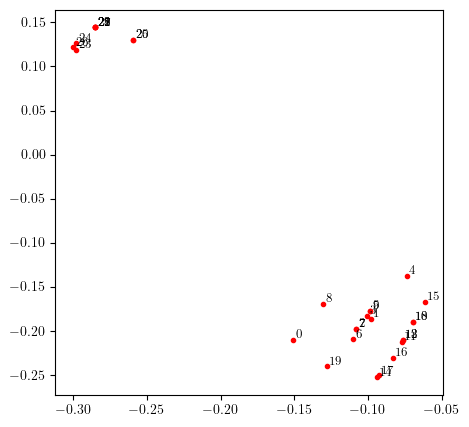

In [417]:
# Generate SBM
a = 0.9
b = 0.01
W = b * np.ones([3,3]) + (a-b) * np.eye(3)
# W = np.array([[0.5, 0.1, 0.1], [0.1, 0.5, 0.1], [0.1, 0.1, 0.5]])

r = 10
c = [0]*r + [1]*r + [2]*r

G = SBM(W,c)

# Spectral Embedding
#L = nx.normalized_laplacian_matrix(G).todense()
A = nx.adjacency_matrix(G).todense()
eigenvalues, eigenvectors = LA.eig(A)
d = 2
U = np.array(eigenvectors[:, :d])

# Plot
fig = plt.figure(figsize=[5,5], constrained_layout=False)
ax = fig.add_subplot()
offset = 0.002
nodes = list(G.nodes())
for i in np.arange(len(nodes)):
    x, y = U[i,:]
    ax.scatter(x, y, marker='.', color='red')
    ax.text(x+offset, y+offset, nodes[i], fontsize=9)


#plt.text(x+.03, y+.03, word, fontsize=9)

#for i, txt in enumerate(np.arange(len(x))):
    #ax.annotate(names[i], (x[i], y[i]))



/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_68321/2941885640.py:27: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).todense()
<class 'networkx.utils.decorators.argmap'> compilation 32:4: FutureWarning: normalized_laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


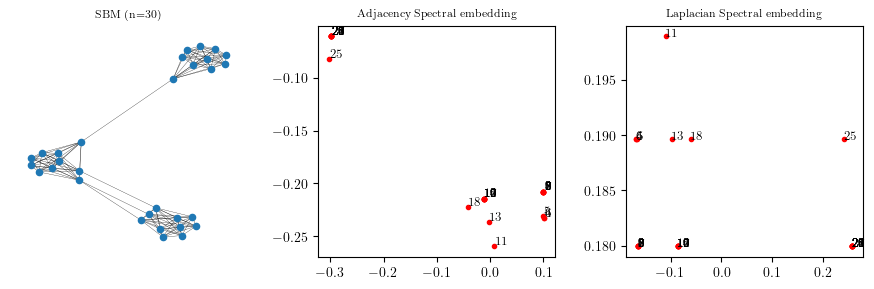

In [512]:
fig = plt.figure(figsize=[11,3], constrained_layout=False)
network_list = [""]
r = 10
a = 0.99
b = 0.01
W = b * np.ones([3,3]) + (a-b) * np.eye(3)
c = [0]*r + [1]*r + [2]*r # community assignment vector
G = SBM(W, c)  

outer_grid = gridspec.GridSpec(nrows=1, ncols=3, wspace=0.3, hspace=0.2)

for i in np.arange(3):
    if i == 0: #plot the graph 
        inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        edges = G.edges()
        weights = [0.2 for u,v in G.edges]
        nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph')#, pos=nx.spectral_layout(G))
        #ax.legend()
        ax.set_title(r"SBM (n={})".format(3*r), fontsize=8)
        
        
    elif i == 1: # Adjacency embedding
        inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        
        A = nx.adjacency_matrix(G).todense()
        w, v = np.linalg.eigh(A)
        U = np.array(v[:, -2:]) # evals are in increasing order 

        offset = 0.002
        nodes = list(G.nodes())
        for i in np.arange(len(nodes)):
            x, y = U[i,:]
            ax.scatter(x, y, marker='.', color='red')
            ax.text(x+offset, y+offset, nodes[i], fontsize=9)
        ax.set_title(r"Adjacency Spectral embedding", fontsize=8)
    
    elif i == 2: # Laplacian embedding
        inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
        ax = fig.add_subplot(inner_grid[0, 0])
        
        L = nx.normalized_laplacian_matrix(G).todense()
        w, v = np.linalg.eigh(-L)
        U = np.array(v[:, -2:])
        
        offset = 0
        nodes = list(G.nodes())
        for i in np.arange(len(nodes)):
            x, y = U[i,:]
            ax.scatter(x, y, marker='.', color='red')
            ax.text(x+offset, y+offset, nodes[i], fontsize=9)
        ax.set_title(r"Laplacian Spectral embedding", fontsize=8)
        

plt.savefig("SBM_embedding", bbox_inches="tight")

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_68321/9812291.py:25: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))


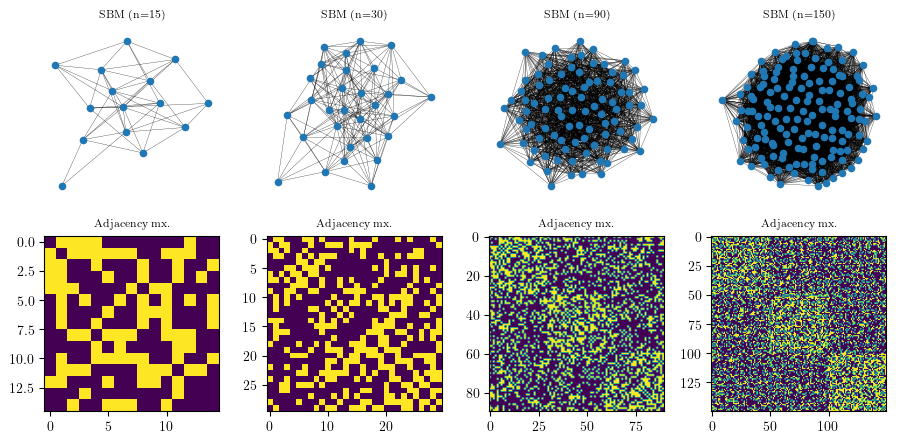

In [426]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
r_list=[5, 10, 30, 50]

a = 0.5
b = 0.3
W = b * np.ones([3,3]) + (a-b) * np.eye(3)

outer_grid = gridspec.GridSpec(nrows=2, ncols=len(r_list), wspace=0.2, hspace=0.2)

for i in np.arange(len(r_list)): 
    r = r_list[i]
    c = [0]*r + [1]*r + [2]*r # community assignment vector
    
    G = SBM(W, c)    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.2 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph')#, pos=nx.spectral_layout(G))
    #ax.legend()
    ax.set_title(r"SBM (n={})".format(3*r), fontsize=8)

    
    A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.imshow(A1.todense())
    #ax.legend()
    ax.set_title(r"Adjacency mx.", fontsize=8)


plt.savefig("SBM_ex1", bbox_inches="tight")